# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
#import sys
#sys.path.pop(0)

'/Users/gks/Dropbox/mypylib/notebooks/GIT'

# Lets import our package 

In [2]:
import rmfit
rmfit

<module 'rmfit' from '/Users/gks/opt/anaconda2/envs/py36/lib/python3.6/site-packages/rmfit-0.1.0-py3.6.egg/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [3]:
# Data from:
# Winn et al. 2009: https://ui.adsabs.harvard.edu/abs/2009ApJ...700..302W/abstract
# Keck HIRES
df = pd.read_csv('../data/example/02_xo3/winn2009_xo3.txt',comment='#')
df

,bjd,rv,e_rv
0,2.454865e+06,295.28,8.47
1,2.454865e+06,283.24,9.22
2,2.454865e+06,236.89,8.63
3,2.454865e+06,221.36,8.68
4,2.454865e+06,228.46,8.29
5,2.454865e+06,193.07,8.10
6,2.454865e+06,182.65,8.45
7,2.454865e+06,151.37,8.58
8,2.454865e+06,133.62,8.85
9,2.454865e+06,103.70,9.28


Text(0, 0.5, 'RV [m/s]')

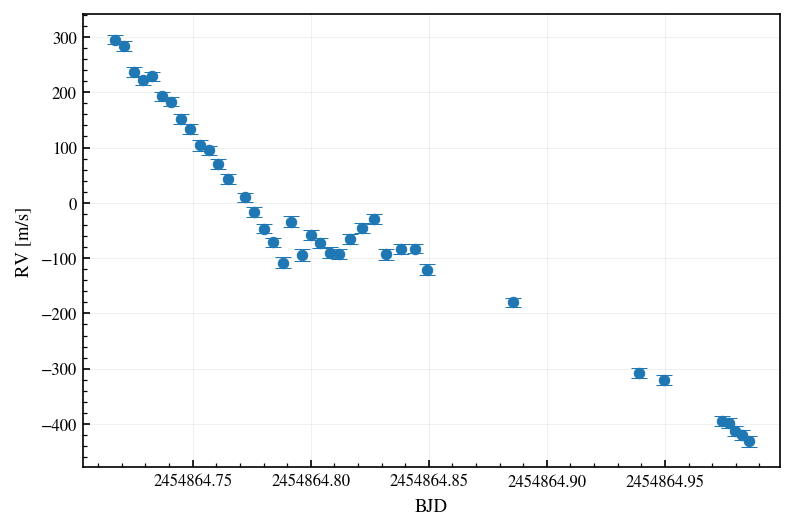

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [5]:
f = '../data/example/02_xo3/xo3_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/02_xo3/xo3_priors.dat
   prior          arg1        arg2     label description priortype  fixed
0     NP  2.454450e+06    0.000230     t0_p1       t0_p1     model  False
1     NP  3.191524e+00    0.000007      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.000000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.000000     vsini       vsini     model  False
4     NP  8.420000e+01    0.540000    inc_p1      inc_p1     model  False
5     NP  9.057000e-02    0.000570      p_p1        p_p1     model  False
6     NP  7.070000e+00    0.310000      a_p1        a_p1     model  False
7     NP  3.200000e-01    0.050000        u1          u1     model  False
8     NP  3.600000e-01    0.050000        u2          u2     model  False
9     NP  2.884000e-01    0.003500    ecc_p1      ecc_p1     model  False
10    NP  3.460000e+02    1.300000  omega_p1    omega_p1     model  False
11    NP  6.200000e+00    0.500000     vbeta    

In [6]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454450e+06  2.454450e+06  2.454450e+06  2.454450e+06     0.000026
1       P_p1  3.191524e+00  3.191490e+00  3.191558e+00  3.191521e+00     0.000002
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  3.274116e+01   -32.741162
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.647195e+01    -1.471953
4     inc_p1  8.420000e+01  8.150000e+01  8.690000e+01  8.417130e+01     0.028703
5       p_p1  9.057000e-02  8.772000e-02  9.342000e-02  9.074306e-02    -0.000173
6       a_p1  7.070000e+00  5.520000e+00  8.620000e+00  7.070317e+00    -0.000317
7         u1  3.200000e-01  7.000000e-02  5.700000e-01  3.305650e-01    -0.010565
8         u2  3.600000e-01  1.100000e-01  6.100000e-01  3.679292e-01    -0.007929
9     ecc_p1  2.884000e-01  2.709000e-01  3.059000e-01  2.886799e-01    -0.000280
10  omega_p1  3.460000e+02  3.395000

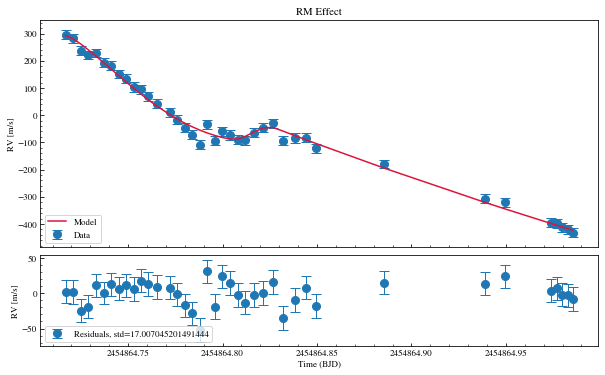

In [7]:
# plot best-fit
TF.plot_fit(TF.min_pv)

In [8]:
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Reading in priorfile from ../data/example/02_xo3/xo3_priors.dat
   prior          arg1        arg2     label description priortype  fixed
0     NP  2.454450e+06    0.000230     t0_p1       t0_p1     model  False
1     NP  3.191524e+00    0.000007      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.000000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.000000     vsini       vsini     model  False
4     NP  8.420000e+01    0.540000    inc_p1      inc_p1     model  False
5     NP  9.057000e-02    0.000570      p_p1        p_p1     model  False
6     NP  7.070000e+00    0.310000      a_p1        a_p1     model  False
7     NP  3.200000e-01    0.050000        u1          u1     model  False
8     NP  3.600000e-01    0.050000        u2          u2     model  False
9     NP  2.884000e-01    0.003500    ecc_p1      ecc_p1     model  False
10    NP  3.460000e+02    1.300000  omega_p1    omega_p1     model  False
11    NP  6.200000e+00    0.500000     vbeta    

No flatchain passed, defaulting to using full chains
Plotting curve with best-fit mcmc values


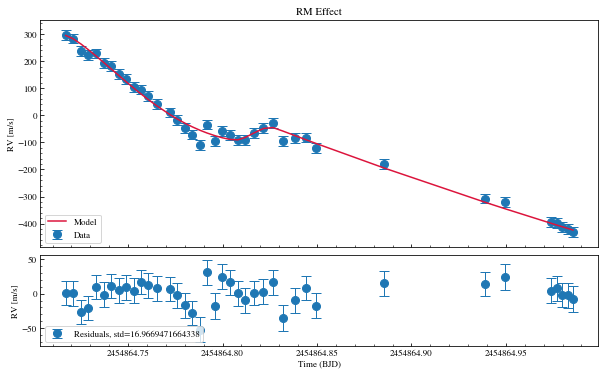

In [9]:
# Plot the MCMC fit
TF.plot_mcmc_fit()

In [10]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([ 2.45444987e+06,  3.19152411e+00,  3.31873992e+01,  1.65795439e+01,
        8.42423224e+01,  9.05709030e-02,  7.10377033e+00,  3.27528198e-01,
        3.63920490e-01,  2.88377704e-01,  3.45284711e+02,  6.30164836e+00,
        1.48426288e+03, -2.91893946e+02,  1.55973133e+01])

## Plot chains 

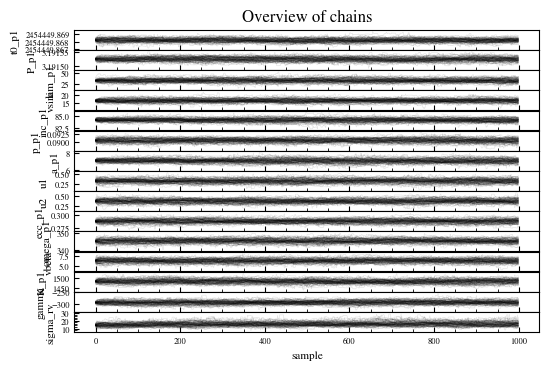

In [11]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [12]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,ecc_p1,omega_p1,vbeta,K_p1,gamma,sigma_rv
0,2.454450e+06,3.191510,30.913275,15.656784,83.981411,0.090571,6.713000,0.343291,0.365935,0.291789,344.121440,6.453598,1509.378684,-298.852349,14.994117
1,2.454450e+06,3.191511,30.963031,15.701248,83.980500,0.090563,6.716363,0.342753,0.366115,0.291766,344.174336,6.449911,1508.800839,-298.618973,14.954518
2,2.454450e+06,3.191511,30.963031,15.701248,83.980500,0.090563,6.716363,0.342753,0.366115,0.291766,344.174336,6.449911,1508.800839,-298.618973,14.954518
3,2.454450e+06,3.191511,30.963031,15.701248,83.980500,0.090563,6.716363,0.342753,0.366115,0.291766,344.174336,6.449911,1508.800839,-298.618973,14.954518
4,2.454450e+06,3.191511,30.963031,15.701248,83.980500,0.090563,6.716363,0.342753,0.366115,0.291766,344.174336,6.449911,1508.800839,-298.618973,14.954518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2.454450e+06,3.191520,31.068214,16.795834,83.779084,0.089823,6.833566,0.365445,0.256146,0.290176,345.092237,7.303668,1499.998290,-294.936340,13.601722
79996,2.454450e+06,3.191520,31.068214,16.795834,83.779084,0.089823,6.833566,0.365445,0.256146,0.290176,345.092237,7.303668,1499.998290,-294.936340,13.601722
79997,2.454450e+06,3.191520,31.068214,16.795834,83.779084,0.089823,6.833566,0.365445,0.256146,0.290176,345.092237,7.303668,1499.998290,-294.936340,13.601722
79998,2.454450e+06,3.191520,31.068214,16.795834,83.779084,0.089823,6.833566,0.365445,0.256146,0.290176,345.092237,7.303668,1499.998290,-294.936340,13.601722


In [13]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.14414217, 1.10726883, 1.14219615, 1.12944063, 1.11383968,
       1.13826401, 1.12012315, 1.13370533, 1.16673403, 1.14597293,
       1.12267149, 1.14032664, 1.13899153, 1.13040763, 1.17049173])

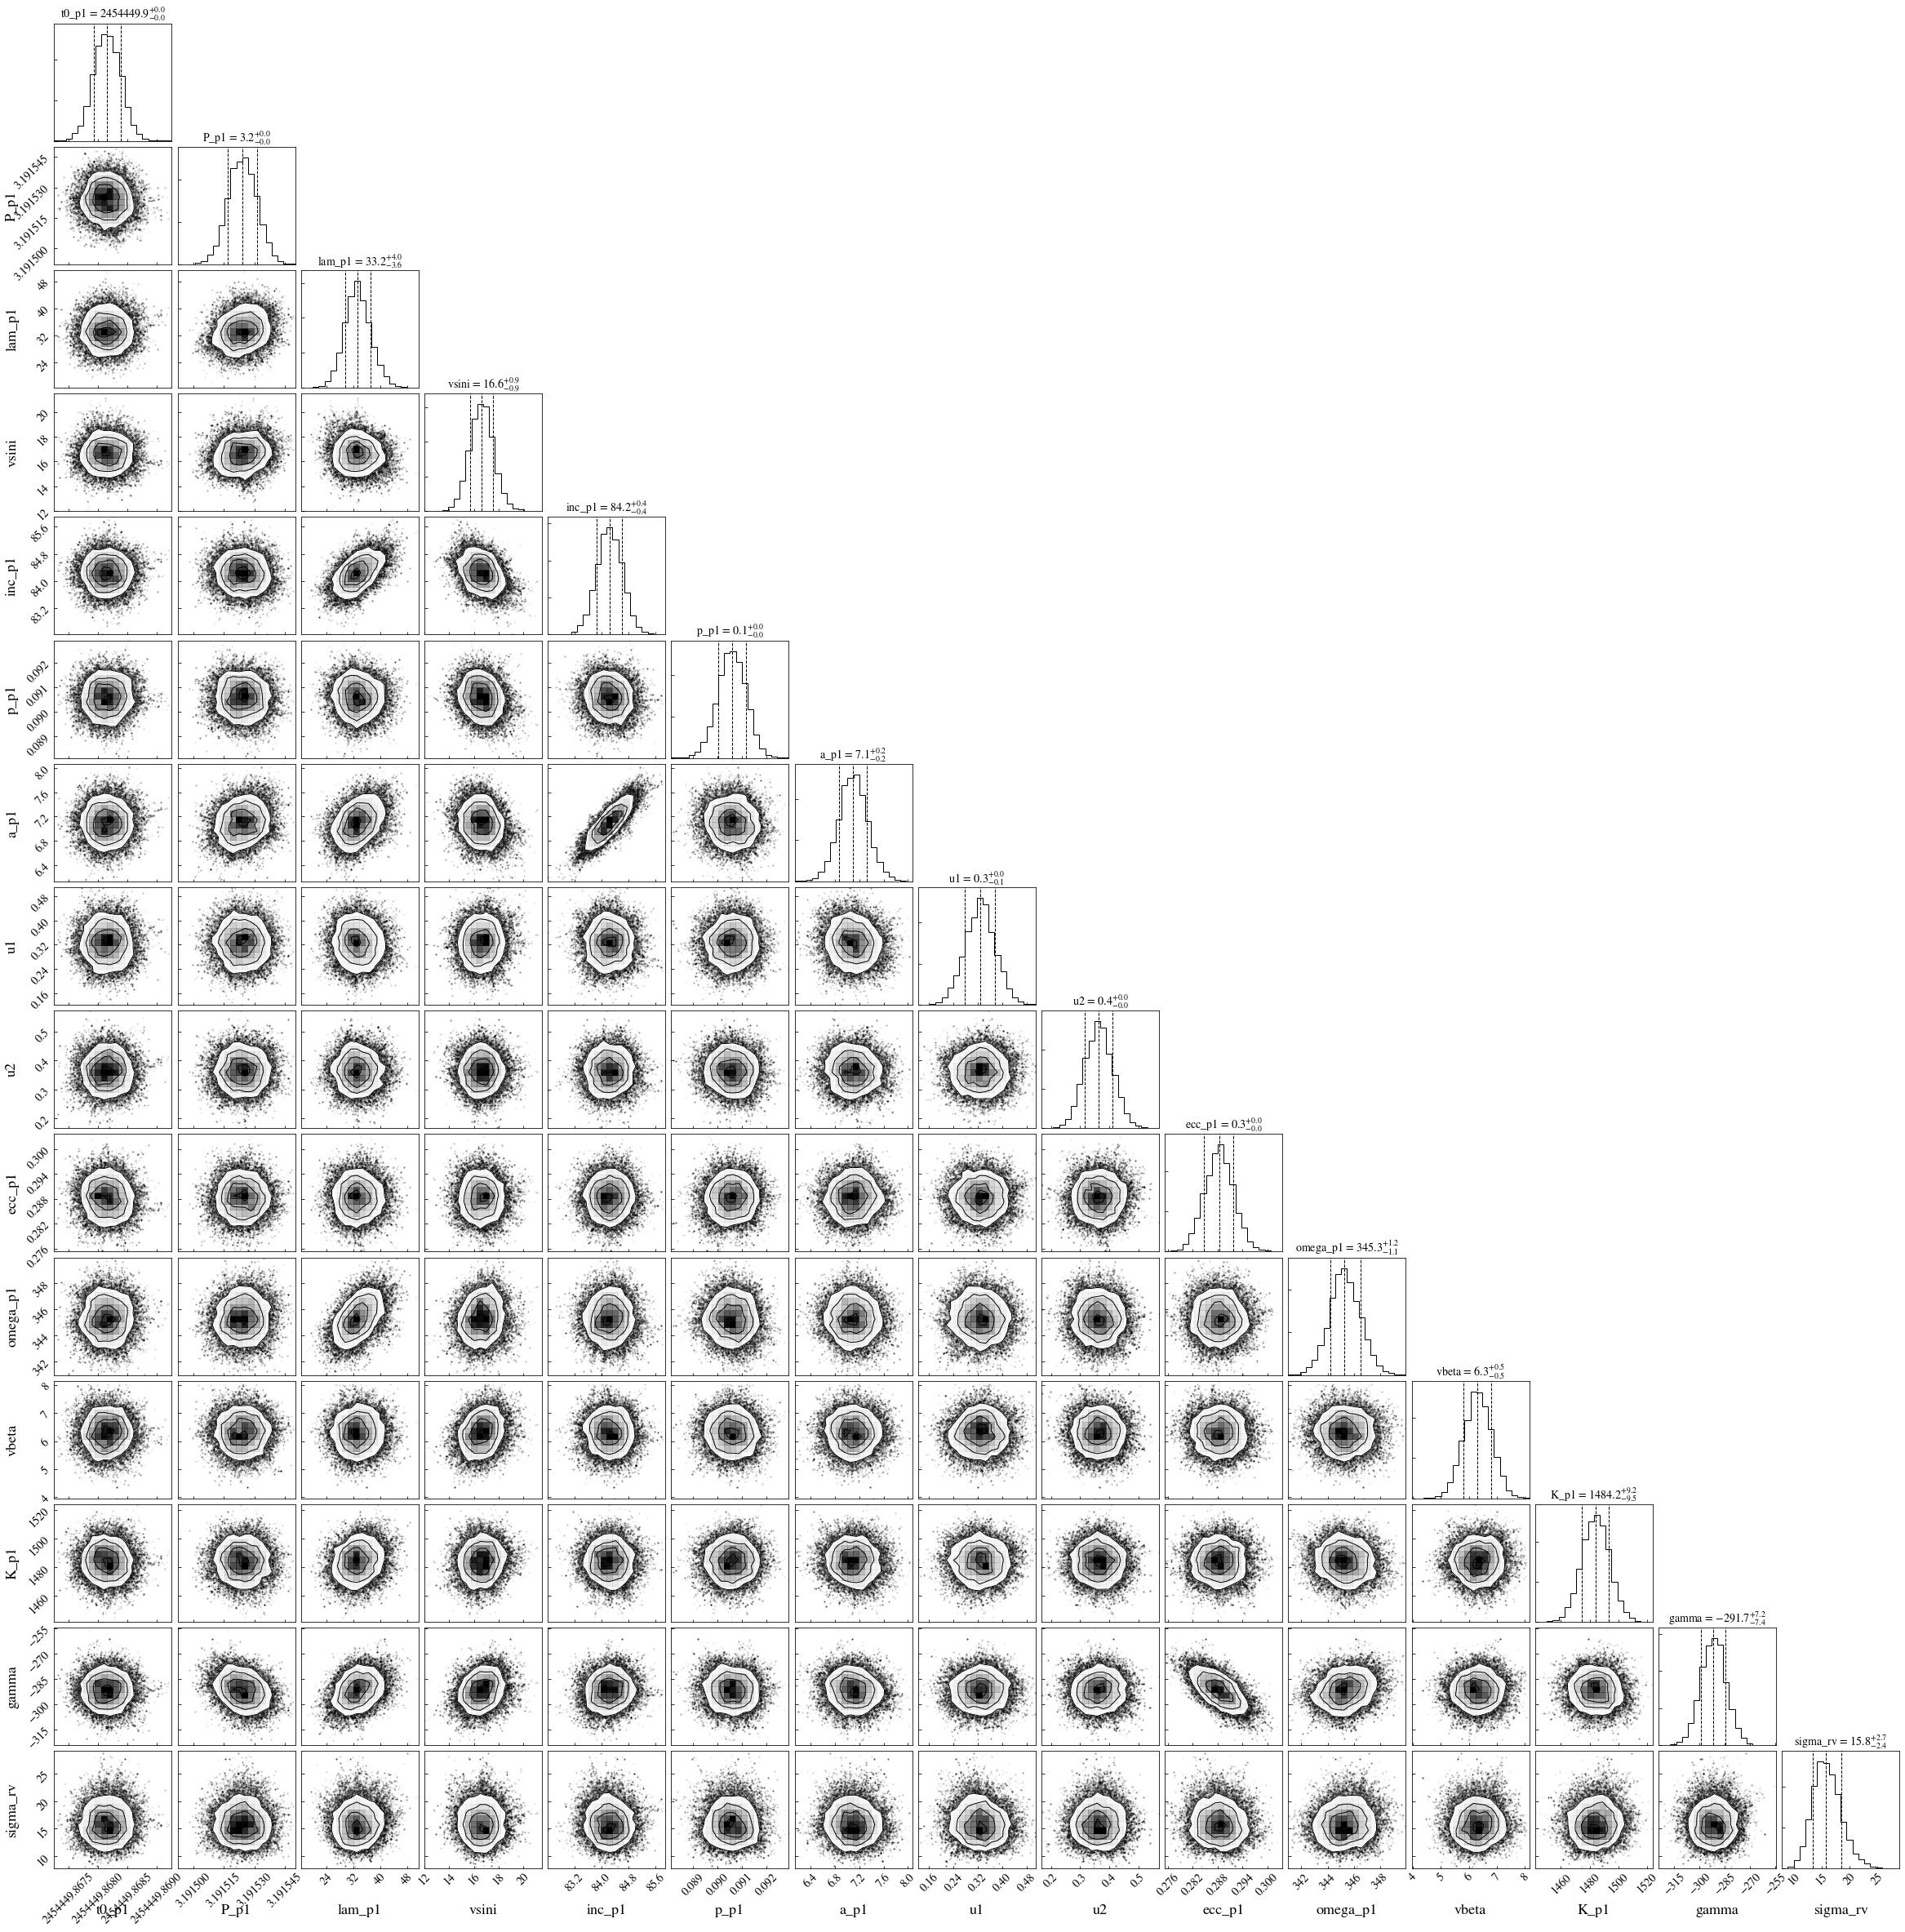

In [14]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

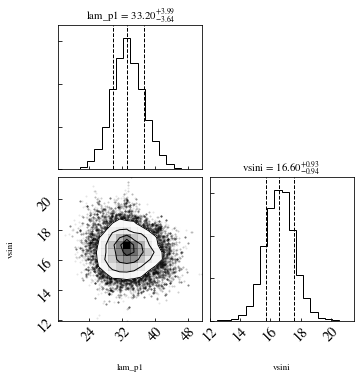

In [15]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])

In [16]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454450e+06,0.000224,0.000234,$2454449.86815_{-0.00022}^{+0.00023}$,t0_p1,t0_p1
0,3.191524e+00,0.000007,0.000007,$3.1915241_{-0.000007}^{+0.000007}$,P_p1,P_p1
0,3.320449e+01,3.639162,3.992607,$33.2_{-3.6}^{+4.0}$,lam_p1,lam_p1
0,1.659836e+01,0.939862,0.932998,$16.6_{-0.94}^{+0.93}$,vsini,vsini
0,8.423385e+01,0.380162,0.373174,$84.23_{-0.38}^{+0.37}$,inc_p1,inc_p1
0,9.057980e-02,0.000566,0.000572,$0.09058_{-0.00057}^{+0.00057}$,p_p1,p_p1
0,7.096712e+00,0.231635,0.232867,$7.1_{-0.23}^{+0.23}$,a_p1,a_p1
0,3.279410e-01,0.050364,0.048067,$0.328_{-0.050}^{+0.048}$,u1,u1
0,3.637297e-01,0.048731,0.048179,$0.364_{-0.049}^{+0.048}$,u2,u2
0,2.883341e-01,0.003596,0.003417,$0.2883_{-0.0036}^{+0.0034}$,ecc_p1,ecc_p1


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


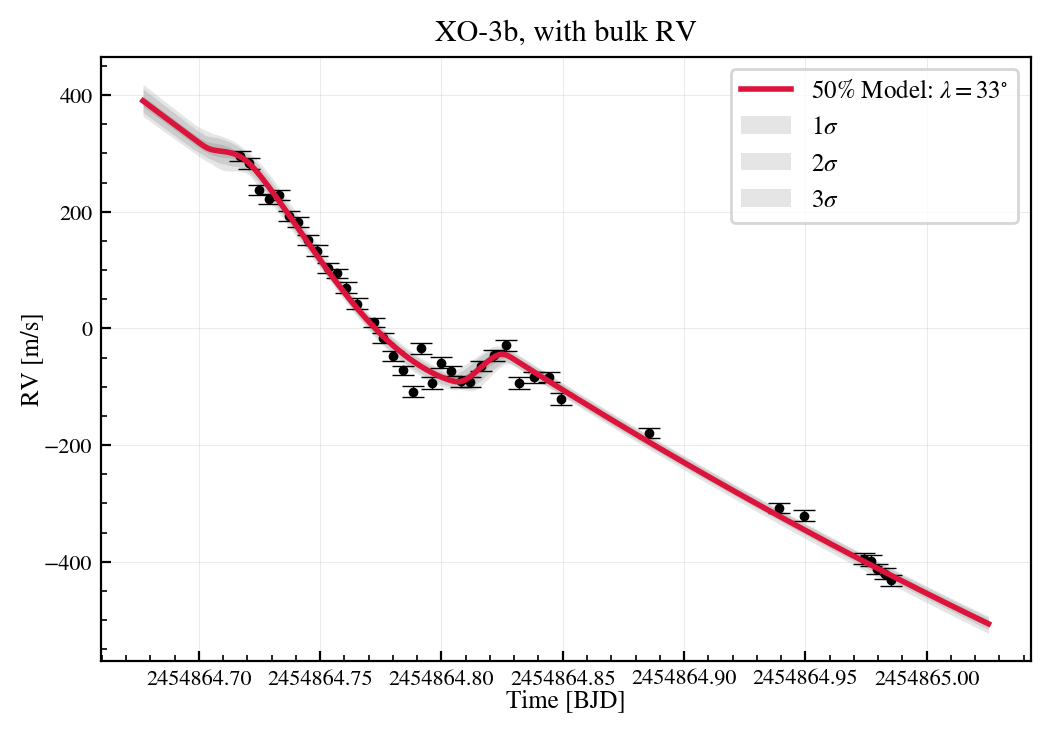

In [17]:
TITLE = 'XO-3b, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax,ticksize=8)